# **System Recommendations Movies and TV Show Netflix**

---
*by Laily Rachmah*


Dataset dapat di unduh melalui [tautan ini](https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238&searchQuery=recom)

# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Data Understanding

---
Dataset memiliki 12 feature yaitu
*   show_id
*   type
*   title
*   director
*   cast
*   country
*   date_added
*   release_year
*   rating
*   duration_ms
*   listed_in
*   description

Pada 12 feature tersebut, dalam sistem rekomendasi ini hanya menggunakan type, title, listed_in dan description.


Berikut rincian 4 feature yang digunakan

*   type : tipe konten berupa Movie atau TV Show
*   Title : judul konten
*   listed_in : kategori atau genre konten
*   description : deskripsi singkat dari konten



## Data Loading

In [2]:
data = pd.read_csv('/content/netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Remove feature yang tidak digunakan

In [3]:
data = data.drop(['show_id', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration'], axis=1)
data.head()

,type,title,listed_in,description
0,Movie,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory Data Analysis (EDA)

---



> ## Deskripsi Variabel


Informasi data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         8807 non-null   object
 1   title        8807 non-null   object
 2   listed_in    8807 non-null   object
 3   description  8807 non-null   object
dtypes: object(4)
memory usage: 275.3+ KB


Memiliki 3 column dan 8807 row data dengan tipe object

> ## Missing Value

In [5]:
data.isna().sum()

type           0
title          0
listed_in      0
description    0
dtype: int64

Tidak ada missing value/data null

> ## Duplicate

In [6]:
data.duplicated().sum()

0

Tidak ada data duplikat

> ## Univariate Exploratory Data Analysis

### Distribusi _type_ Movies dan TV Show

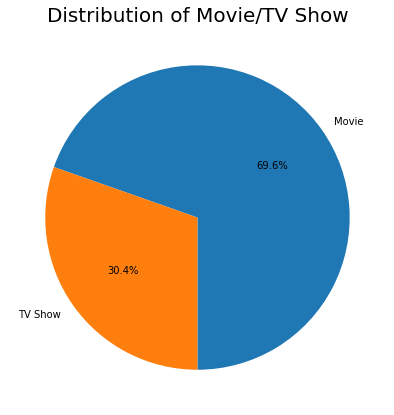

In [7]:
plt.figure(figsize=(15,7))
labels = data['type'].value_counts(sort = True).index
sizes = data['type'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=270,)
plt.title('Distribution of Movie/TV Show',size = 20)
plt.show()

Data Movie dengan jumlah 69.6% dan TV Show dengan jumlah 30.4% dari seluruh data

### Distribusi Berdasarkan Genre

Mengambil nilai unik dari feature listed_in dengan split data dan dimasukkan kedalam list genres

In [8]:
data_genre = data.drop(['description'], axis=1)
genres=[]
for i in range(len(data_genre.listed_in)):
    for x in data_genre.listed_in[i].split(', '):
        if x not in genres:
            genres.append(x)
genres

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Horror',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Comedies',
 'Spanish-Language TV Shows',
 'Thrillers',
 'Romantic Movies',
 'Music & Musicals',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'TV Thrillers',
 "Kids' TV",
 'Action & Adventure',
 'TV Sci-Fi & Fantasy',
 'Classic Movies',
 'Anime Features',
 'Sports Movies',
 'Anime Series',
 'Korean TV Shows',
 'Science & Nature TV',
 'Teen TV Shows',
 'Cult Movies',
 'TV Shows',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'Stand-Up Comedy',
 'Movies',
 'Stand-Up Comedy & Talk Shows',
 'Classic & Cult TV']

Melakukan encoding data pada dataframe agar memudahkan untuk menghitung jumlah konten berdasarkan genre

In [9]:
for x in genres:
    data_genre[x] = 0

for i in range(len(data_genre.listed_in)):
    for x in data_genre.listed_in[i].split(', '):
        data_genre[x][i]=1

data_genre.head()

,type,title,listed_in,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,Movie,Dick Johnson Is Dead,Documentaries,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV",0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Mengambil jumlah genre dari dataframe sebelumnya dan dimasukkan kedalam list genre_sum

In [10]:
genre_sum = list(data_genre.iloc[:,3:].sum())
genre_sum

[869,
 1351,
 763,
 98,
 470,
 168,
 395,
 255,
 370,
 581,
 75,
 641,
 2427,
 756,
 2752,
 253,
 1674,
 174,
 577,
 616,
 375,
 357,
 243,
 57,
 451,
 859,
 84,
 116,
 71,
 219,
 176,
 151,
 92,
 69,
 71,
 16,
 65,
 102,
 343,
 57,
 56,
 28]

Dimasukkan kedalam dataframe baru dengan nilai genres dan genre_sum kemudian dilakukan visualisasi data menggunakan barplot

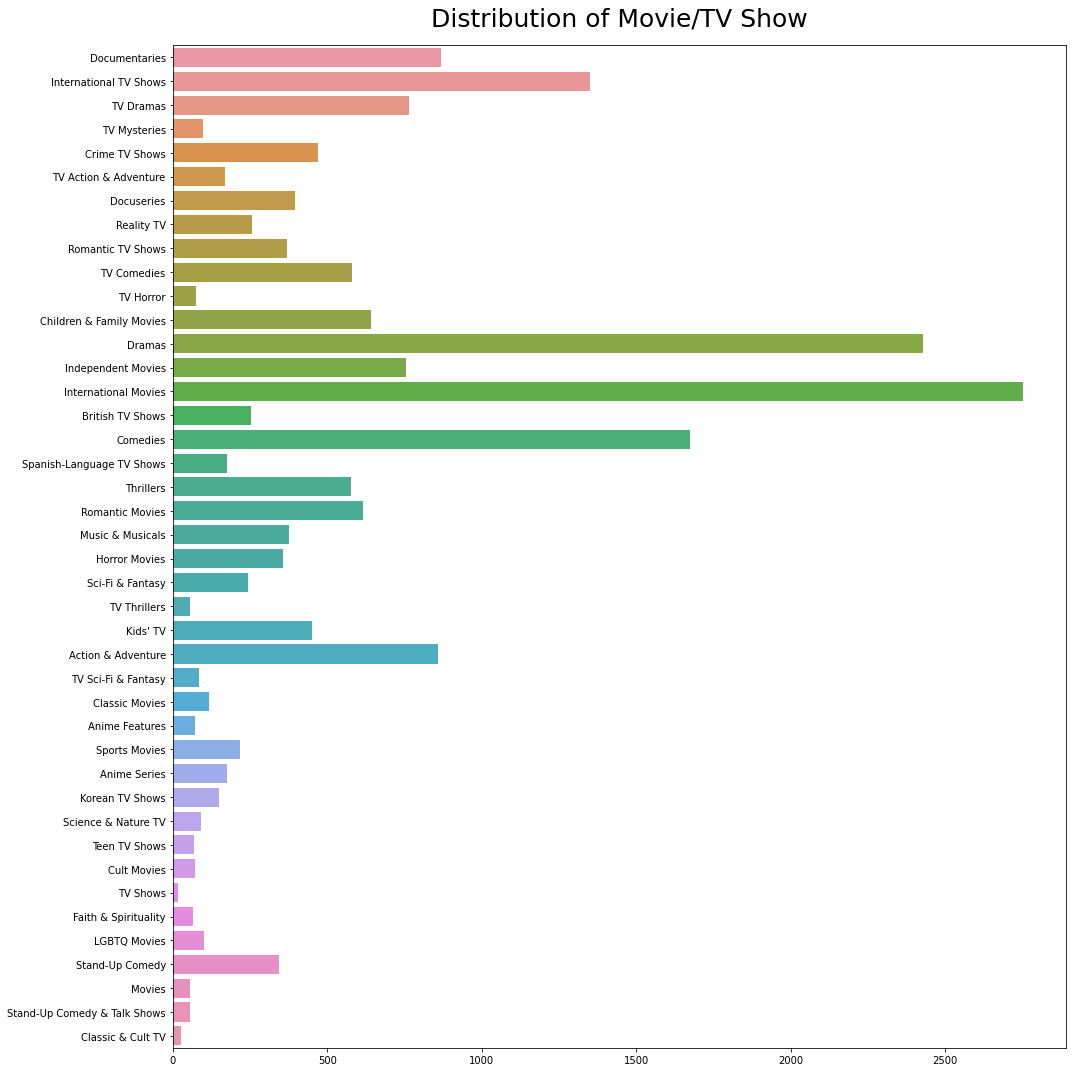

In [11]:
data_genre_new = {'genre': pd.Series(genres),
                  'total': pd.Series(genre_sum)}

plt.figure(figsize=(15,15))
sns.barplot(y='genre', x='total', data=data_genre_new)
plt.title('Distribution of Movie/TV Show', fontsize=25, pad=20)
plt.tight_layout()
plt.show()

Dapat dilihat data terbanyak yaitu ada pada genre International Movies kemudian yang ke-dua yaitu Dramas dst.

### Word Popular pada _description_ dengan WordCloud

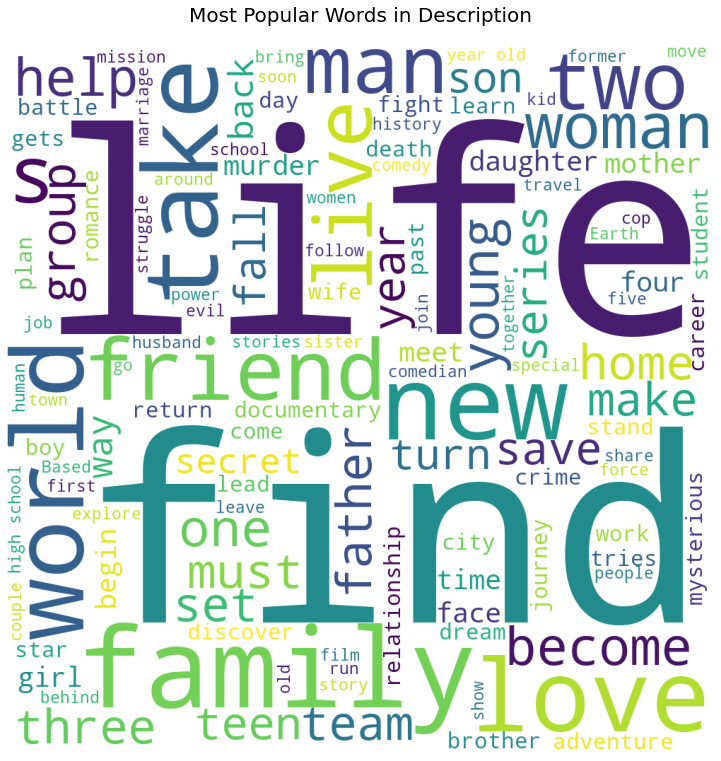

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS, width = 1000, background_color='white', height = 1000, max_words = 121).generate(' '.join(data['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Description',fontsize = 20, pad=25)
plt.show()

Kata populer teratas yaitu life dan find dst.

> ## Data Preprocessing



### Membagi Data Berdasarkan _type_ Movie dan TV Show

In [13]:
movies = data[data['type'] == 'Movie'].reset_index()
movies.head()

,index,type,title,listed_in,description
0,0,Movie,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,6,Movie,My Little Pony: A New Generation,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,7,Movie,Sankofa,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,9,Movie,The Starling,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,12,Movie,Je Suis Karl,"Dramas, International Movies",After most of her family is murdered in a terr...


In [14]:
tv = data[data['type'] == 'TV Show'].reset_index()
tv.head()

,index,type,title,listed_in,description
0,1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,5,TV Show,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Menghilangkan Stop Word dan Lemmatization pada _description_ Konten

In [15]:
stop_word = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

Stop word dan lemmatization pada data Movie

In [16]:
movies['description'] = movies['description'].apply(lambda x:' '.join([word if word in stop_word else lemmatizer.lemmatize(word) for word in x.split()]))
movies

,index,type,title,listed_in,description
0,0,Movie,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,6,Movie,My Little Pony: A New Generation,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,7,Movie,Sankofa,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,9,Movie,The Starling,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,12,Movie,Je Suis Karl,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...
6126,8801,Movie,Zinzana,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wake up inside a sm...
6127,8802,Movie,Zodiac,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
6128,8804,Movie,Zombieland,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
6129,8805,Movie,Zoom,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Stop word dan lemmatization pada data TV Show

In [17]:
tv['description'] = tv['description'].apply(lambda x:' '.join([word if word in stop_word else lemmatizer.lemmatize(word) for word in x.split()]))
tv

,index,type,title,listed_in,description
0,1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing path at a party, a Cape Town te..."
1,2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtation and toilet talk go down amon..."
3,4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching center known to train In...
4,5,TV Show,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...
2671,8795,TV Show,Yu-Gi-Oh! Arc-V,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
2672,8796,TV Show,Yunus Emre,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaf h..."
2673,8797,TV Show,Zak Storm,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
2674,8800,TV Show,Zindagi Gulzar Hai,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


### Membuat Kolom Baru Untuk Menampung Nilai Dari _listed_in_ dan _description_ Untuk Modelling

In [18]:
movies['text'] = movies['listed_in'] + ' ' + movies['description']

In [19]:
tv['text'] = tv['listed_in'] + ' ' + tv['description']

# Model Development

---



> ## Content-Based Filtering



### TF-IDF Vectorizer

Menggunakan parameter min_df untuk menghilangkan term yang jarang muncul

In [20]:
tfidf = TfidfVectorizer(min_df = 0.01)

Dilakukan fit data pada Movie dan Lihat cetak feature

In [21]:
tfidf.fit(movies['text'])
tfidf.get_feature_names()

['about',
 'action',
 'adventure',
 'after',
 'against',
 'agent',
 'all',
 'american',
 'an',
 'and',
 'anime',
 'are',
 'around',
 'art',
 'as',
 'at',
 'attempt',
 'back',
 'band',
 'based',
 'battle',
 'be',
 'become',
 'becomes',
 'been',
 'before',
 'begin',
 'behind',
 'being',
 'best',
 'between',
 'big',
 'bond',
 'both',
 'boy',
 'brother',
 'business',
 'but',
 'by',
 'can',
 'career',
 'change',
 'child',
 'childhood',
 'children',
 'christmas',
 'city',
 'classic',
 'college',
 'come',
 'comedian',
 'comedies',
 'comedy',
 'comic',
 'cop',
 'country',
 'couple',
 'crime',
 'criminal',
 'cult',
 'dangerous',
 'dark',
 'daughter',
 'day',
 'death',
 'determined',
 'different',
 'discovers',
 'documentaries',
 'documentary',
 'down',
 'drama',
 'dramas',
 'dream',
 'drug',
 'during',
 'each',
 'earth',
 'end',
 'evil',
 'ex',
 'face',
 'faith',
 'fall',
 'family',
 'fantasy',
 'father',
 'features',
 'fi',
 'fight',
 'film',
 'find',
 'first',
 'follows',
 'for',
 'force',
 '

Dilakukan fit data pada TV Show dan Lihat cetak feature

In [22]:
tfidf.fit(tv['text'])
tfidf.get_feature_names()

['about',
 'action',
 'adventure',
 'after',
 'against',
 'agent',
 'all',
 'american',
 'an',
 'and',
 'animal',
 'animated',
 'anime',
 'are',
 'around',
 'as',
 'at',
 'back',
 'band',
 'based',
 'battle',
 'be',
 'become',
 'becomes',
 'before',
 'begin',
 'behind',
 'being',
 'best',
 'between',
 'big',
 'both',
 'boy',
 'british',
 'brother',
 'business',
 'but',
 'by',
 'can',
 'career',
 'case',
 'celebrity',
 'century',
 'challenge',
 'chance',
 'change',
 'chef',
 'child',
 'city',
 'classic',
 'college',
 'come',
 'comedian',
 'comedies',
 'comedy',
 'compete',
 'competition',
 'cop',
 'country',
 'couple',
 'crew',
 'crime',
 'criminal',
 'cult',
 'culture',
 'dark',
 'daughter',
 'day',
 'death',
 'detective',
 'different',
 'discover',
 'documentary',
 'docuseries',
 'down',
 'drama',
 'dramas',
 'dream',
 'drug',
 'during',
 'each',
 'earth',
 'elite',
 'encounter',
 'every',
 'everything',
 'evil',
 'ex',
 'expert',
 'explore',
 'explores',
 'face',
 'fall',
 'family',


### Melakukan Fit dan Tranform data ke Dalam Matrix


Pada data Movie

In [23]:
tfidf_movies_matrix = tfidf.fit_transform(movies['text'])
tfidf_movies_matrix.shape

(6131, 285)

Pada data TV Show

In [24]:
tfidf_tv_matrix = tfidf.fit_transform(tv['text'])
tfidf_tv_matrix.shape

(2676, 302)

### Menghitung Cosine Similarity



Pada data Movie

In [25]:
cos_sim_movies = cosine_similarity(tfidf_movies_matrix)
cos_sim_movies

array([[1.        , 0.04305068, 0.11266532, ..., 0.05399009, 0.09181076,
        0.209803  ],
       [0.04305068, 1.        , 0.0679167 , ..., 0.06613377, 0.12379424,
        0.10775066],
       [0.11266532, 0.0679167 , 1.        , ..., 0.13566706, 0.09169293,
        0.17028641],
       ...,
       [0.05399009, 0.06613377, 0.13566706, ..., 1.        , 0.17974669,
        0.03418044],
       [0.09181076, 0.12379424, 0.09169293, ..., 0.17974669, 1.        ,
        0.07488837],
       [0.209803  , 0.10775066, 0.17028641, ..., 0.03418044, 0.07488837,
        1.        ]])

Pada data TV Show

In [26]:
cos_sim_tv = cosine_similarity(tfidf_tv_matrix)
cos_sim_tv

array([[1.        , 0.07138401, 0.1183659 , ..., 0.16756284, 0.08302266,
        0.14081437],
       [0.07138401, 1.        , 0.03237313, ..., 0.06096666, 0.09415982,
        0.06935512],
       [0.1183659 , 0.03237313, 1.        , ..., 0.05811974, 0.03516551,
        0.03272105],
       ...,
       [0.16756284, 0.06096666, 0.05811974, ..., 1.        , 0.02890326,
        0.0958815 ],
       [0.08302266, 0.09415982, 0.03516551, ..., 0.02890326, 1.        ,
        0.06577729],
       [0.14081437, 0.06935512, 0.03272105, ..., 0.0958815 , 0.06577729,
        1.        ]])

### Membuat Dataframe Baru Berdasarkan Cosine Similarity

Dataframe untuk Movie

In [27]:
cosine_sim_mvs = pd.DataFrame(cos_sim_movies, index=movies['title'], columns=movies['title'])
print('Shape:', cosine_sim_mvs.shape)
 

cosine_sim_mvs.sample(5, axis=1).sample(10, axis=0)

Shape: (6131, 6131)


title,Ghost Lab,This Is the Life,Lizzie Borden Took an Ax,7 Khoon Maaf,We Are Family
title,,,,,
Ekşi Elmalar,0.131873,0.133046,0.143831,0.158522,0.180019
New Money,0.115808,0.056238,0.058831,0.117822,0.099081
The Edge of Democracy,0.179247,0.174660,0.119083,0.105048,0.117550
Dolphin Kick,0.102474,0.045805,0.056889,0.026914,0.034067
Garfield's Pet Force,0.021678,0.117604,0.104707,0.074934,0.082060
Chaahat,0.107094,0.049598,0.101311,0.211924,0.054877
Organize Isler,0.081284,0.040430,0.033914,0.153904,0.025511
Gigi,0.026737,0.387760,0.032757,0.038089,0.100149
Banyuki,0.125369,0.067827,0.358346,0.092482,0.057023


Dataframe untuk TV Show

In [28]:
cosine_sim_tv = pd.DataFrame(cos_sim_tv, index=tv['title'], columns=tv['title'])
print('Shape:', cosine_sim_mvs.shape)
 

cosine_sim_tv.sample(5, axis=1).sample(10, axis=0)

Shape: (6131, 6131)


title,Trio and a Bed,Korean Pork Belly Rhapsody,Ken Burns Presents: College Behind Bars: A Film by Lynn Novick and Produced by Sarah Botstein,Hasmukh,Seven and Me
title,,,,,
The Last O.G.,0.081342,0.035724,0.000000,0.136928,0.028505
Meteor Garden,0.192441,0.230628,0.000000,0.111326,0.224565
Brotherhood,0.186350,0.155229,0.023458,0.122889,0.213032
Saint Seiya,0.078478,0.119882,0.021670,0.041787,0.150097
Revolutionary Love,0.249150,0.239510,0.021028,0.130760,0.067510
Turn Up Charlie,0.099665,0.069958,0.036709,0.123601,0.054028
Civilizations,0.136259,0.108695,0.166118,0.043338,0.041353
Cocomelon,0.056926,0.089915,0.050711,0.019352,0.051701
Power Rangers Dino Super Charge,0.179629,0.135612,0.023081,0.072706,0.134800


### Uji Coba Rekomendasi

> Mendapatkan Rekomendasi Video Berdasarkan Tipe

Fungsi rekomendasi movie

In [29]:
def movies_recommendations(title, similarity_data=cosine_sim_mvs, items=movies[['title', 'listed_in', 'description']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Fungsi rekomendasi TV Show

In [30]:
def tv_recommendations(title, similarity_data=cosine_sim_tv, items=tv[['title', 'listed_in', 'description']], k=10):
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

> Rekomendasi Movie

Cek data Movie

In [31]:
movies[movies.title.eq('Bugs')]

,index,type,title,listed_in,description,text
4216,6387,Movie,Bugs,"Documentaries, International Movies",A willing team of chef and researcher go on a ...,"Documentaries, International Movies A willing ..."


Menguji coba model Movie rekomendasi content-based filtering

In [32]:
movies_recommendations('Bugs')

,title,listed_in,description
0,She Did That,Documentaries,"Go inside the life of extraordinary, black fem..."
1,Chasing Coral,Documentaries,"Divers, scientist and photographer around the ..."
2,The Ivory Game,Documentaries,Filmmakers infiltrate the corrupt global netwo...
3,Operation Chromite,"Action & Adventure, Dramas, International Movies",To pave the way for a major amphibious invasio...
4,The Tour,"Comedies, Documentaries, International Movies","Miloš Knor brings comedian Lukáš Pavlásek, Tom..."
5,Bitcoin Heist,"Action & Adventure, Comedies, International Mo...","A unconventional, efficient Interpol special a..."
6,La Gran Ilusión,International Movies,"Known as ""El Mago Pop,"" illusionist Antonio Dí..."
7,Addicted to Life,"Action & Adventure, Documentaries, Internation...","Chasing extreme challenges, athletic daredevil..."
8,Chappaquiddick,Dramas,Senator Ted Kennedy watch his future unravel i...
9,Madness in the Desert,"Documentaries, International Movies","The story of making ""Lagaan,"" one of the mille..."


> Rekomendasi TV Show

Cek data TV Show

In [33]:
tv[tv.title.eq('Cocomong')]

,index,type,title,listed_in,description,text
1099,3128,TV Show,Cocomong,"Kids' TV, Korean TV Shows",What's in your fridge? In sunny Refrigerator L...,"Kids' TV, Korean TV Shows What's in your fridg..."


Menguji coba model TV Show rekomendasi content-based filtering

In [34]:
tv_recommendations('Cocomong')

,title,listed_in,description
0,Resurrection: Ertugrul,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
1,Miniforce,"Kids' TV, Korean TV Shows",Four animal superheroes called the Miniforce t...
2,Twirlywoos,"British TV Shows, Kids' TV",The colorful and curious family of Twirlywoos ...
3,Vagabond,"International TV Shows, Korean TV Shows, TV Ac...","When his nephew dy in a plane crash, stunt man..."
4,Crash Landing on You,"International TV Shows, Korean TV Shows, Roman...",A paragliding mishap drop a South Korean heire...
5,Arthdal Chronicles,"International TV Shows, Korean TV Shows, TV Ac...","In a mythical land called Arth, the inhabitant..."
6,The Epic Tales of Captain Underpants,"Kids' TV, TV Comedies",Fourth-grade friend George and Harold have a s...
7,Buddy Thunderstruck,"Kids' TV, TV Comedies","Follow the outrageous, high-octane adventure o..."
8,YooHoo to the Rescue,"Kids' TV, Korean TV Shows","In a series of magical missions, quick-witted ..."
9,Octonauts: Above & Beyond,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...
